## Useful tricks vol. 2 - Linear models

#### When to use
Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data.

## 1. Load and fit the boston dataset

In [26]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Let's simply fit the LinearRegression

In [14]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y)
linreg = LinearRegression().fit(X_train, y_train)
print(f".coef_(s): {linreg.coef_.shape} | .intercept_: {linreg.intercept_}")

.coef_(s): (104,) | .intercept_: -24.586737885323554


Let's check out the score

In [15]:
print(f"Training r^2: {linreg.score(X_train, y_train)}")
print(f"Testing r^2: {linreg.score(X_test, y_test)}")

Training r^2: 0.9451856515004383
Testing r^2: 0.7546217468520089


### Alternatives to vanilla LinearRegression: Ridge and Lasso

- **Ridge** = LinearRegression with L2 regularization
    - How much importance the model places on simplicity versus training set performance can be specified by `alpha` parameter
        - very small = barely restricted
- **Lasso** = LinearRegression with L1 regularization
    - 'automatic feature selection': coefficients are forced to be very close to 0, a lot of them is exactly zero

In [19]:
from sklearn.linear_model import Ridge
ridge2 = Ridge(alpha=5).fit(X_train, y_train) # restrict more
print(f"Training r^2: {ridge2.score(X_train, y_train)}")
print(f"Testing r^2: {ridge2.score(X_test, y_test)}")

Training r^2: 0.8217099514910752
Testing r^2: 0.7120208756095725


In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train) # restrict more
print(f"Training r^2: {lasso.score(X_train, y_train)}")
print(f"Testing r^2: {lasso.score(X_test, y_test)}")

Training r^2: 0.23641608900325461
Testing r^2: 0.2038181506341178


We're underfitting, let's play around with the parameters
- decrease `alpha`
- increase `max_iter`

In [23]:
lasso2 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train) # restrict more
print(f"Training r^2: {lasso2.score(X_train, y_train)}")
print(f"Testing r^2: {lasso2.score(X_test, y_test)}")

Training r^2: 0.8992177158632662
Testing r^2: 0.7593595677057744


## Linear classification: LogisticRegression and LinearSVC

### Binary classification

Load a simple synth dataset and compare Logistic and LinearSVC

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


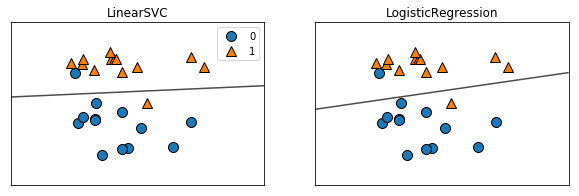

In [31]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
for m,ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = m.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
axes[0].legend()

Let's try the same for Iris dataset

In [71]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
cut_bc = bc.data[:60, :2]
cut_bc_target = bc.target[:60]
print(cut_bc.shape)
print(cut_bc_target.shape)

(60, 2)
(60,)


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


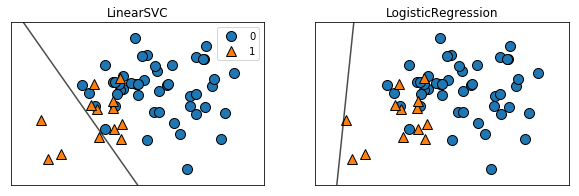

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for m,ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = m.fit(cut_bc,cut_bc_target)
    mglearn.plots.plot_2d_separator(clf, cut_bc, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(cut_bc[:, 0], cut_bc[:, 1], cut_bc_target, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
axes[0].legend()

### Parametrization
- Both classifiers use regularization parameter `C`, which represents the trade-off between training performance (high C - low variance) and fitting `w` close to zero (low C -low bias).
- `LogisticRegression` uses L2 reg by default, L1 reg might be useful and can be set as: `LogisticRegression(C=c, penalty="l1")`

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


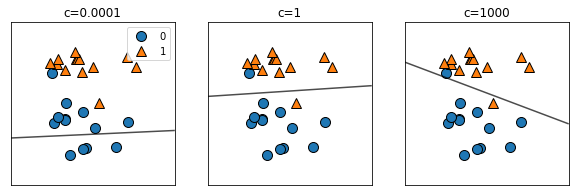

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for c,ax in zip([0.0001, 1, 1000], axes):
    clf = LinearSVC(C=c).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"c={c}")
axes[0].legend()

Left: lot of regularization = underfitting

Right: little reguarization = overfitting

### Multiclass classification
- Only `LogisticRegresion` naturally extends to multiclass setting, in other binary classifiers we have to use a special technique for more classes
    - the *one-vs-rest* approach: binary model is learned for each class, one with the highest score "wins"

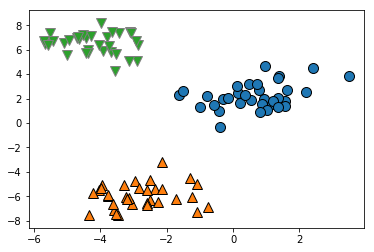

In [73]:
from sklearn.datasets import make_blobs
X,y = make_blobs()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Let's view the decision boundaries on LinearSVC

In [78]:
?LogisticRegression

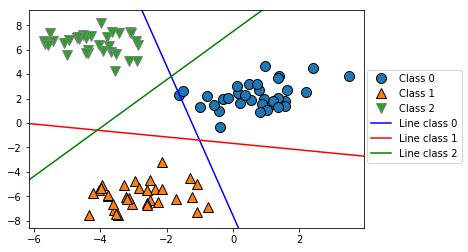

In [76]:
linear_svc = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

### Parameters summary
- `C` = small values = simpler model
- `L1 / L2 reg.` - only few features are important?: L1 otherwise L2
- if very large dataset (100-1000k), try `solver='sag'` for speed

#### Other properties or linear models
- work with large/sparse datasets
- work when n. of features >> n. of examples
- interpretable up to a point, harder when there are a lot of correlated features